In [3]:
import random
from matplotlib import pyplot as plt 

# converting the input matrix into a 2d list
with open("TSP Matrix1.txt") as input:
    distances = [[int(d) for d in line.split(",")] for line in input.read().splitlines()]

# function to calculate the length of the path
def calculate_distance(path):
    l = len(path)
    total = 0
    for i in range(l):
        total += distances[path[i]][path[(i+1)%l]]
    return total

# function generating the initial path using greedy algorithm
# always choosing the closest unvisited node
def create_initial_greedy(matrix, start):
    path = [start]
    while len(path) < len(matrix):
        current = path[-1]
        indices = [ind for ind in range(len(matrix[current])) if ind not in path]
        smallest = float("inf")
        next = -1
        for ind in indices:
            if matrix[current][ind] < smallest:
                smallest = matrix[current][ind]
                next = ind
        path.append(next)
    return path

# function generating a random initial path
def create_initial_random(matrix):
    indices = list(range(len(matrix)))
    random.shuffle(indices)
    return indices


initial_greedy = create_initial_greedy(distances, 0)
print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(initial_greedy))

initial_random = create_initial_random(distances)
print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(initial_random))

Initial Greedy Path: [0, 26, 18, 8, 16, 13, 32, 9, 3, 21, 39, 6, 10, 2, 23, 27, 11, 17, 38, 7, 14, 12, 25, 5, 1, 22, 35, 48, 33, 28, 37, 4, 36, 45, 31, 29, 19, 44, 42, 41, 15, 24, 30, 40, 46, 49, 43, 20, 47, 34]
Initial Greedy Path distance: 82
Initial Random Path: [39, 26, 33, 29, 42, 15, 38, 21, 22, 4, 30, 20, 28, 41, 25, 10, 23, 7, 44, 6, 37, 46, 19, 36, 48, 8, 34, 9, 17, 0, 1, 32, 11, 47, 49, 13, 27, 24, 3, 43, 2, 31, 18, 5, 45, 14, 12, 40, 35, 16]
Initial Random Path distance: 289


Initial distance =  289
Final distance =  96


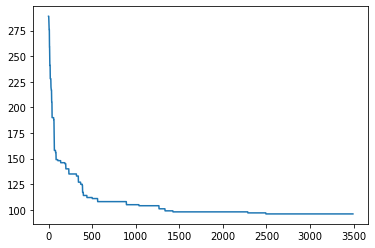

Initial distance =  82
Final distance =  73


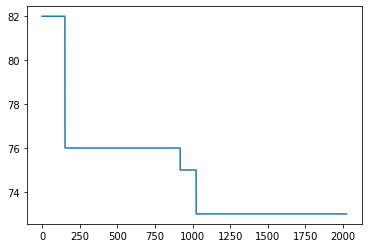

In [4]:
# function that swaps two random nodes
def hill_climbing_random(path):
    p = list(path)
    index1 = random.randrange(0, len(p))
    index2 = index1
    while index2 == index1:
        index2 = random.randrange(0, len(p))
    temp = p[index2]
    p[index2] = p[index1]
    p[index1] = temp
    return p

# function that swaps a random node with its right neighbour
def hill_climbing_neighbour(path):
    p = list(path)
    index1 = random.randrange(0, len(p))
    index2 = (index1 + 1)%len(p)
    temp = p[index2]
    p[index2] = p[index1]
    p[index1] = temp
    return p
    
def run(path):
    p = list(path)
    print("Initial distance = ", calculate_distance(p))
    no_improvement_for = 0
    dists = []
    while no_improvement_for < 1000:
        current_distance = calculate_distance(p)
        dists.append(current_distance)
        new_p = hill_climbing_random(p)
        if calculate_distance(new_p) < current_distance:
            p = new_p
            no_improvement_for = 0
        else:
            no_improvement_for += 1
    print("Final distance = ", dists[-1])
    plt.plot(dists)
    plt.show()

run(initial_random)
run(initial_greedy)